In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('HealtyNormalized.csv')
# Importing the dataset
X['Fault'] = 0

y = pd.read_csv('combinedFault.csv')
y['Fault'] = 1


In [3]:
X.head(), y.head()

(        vsH       vbH  Fault
 0  0.000998 -0.000217      0
 1  0.001001 -0.000185      0
 2  0.001002 -0.000152      0
 3  0.001007 -0.000185      0
 4  0.001010 -0.000217      0,
         vsC       vbC  Fault
 0  0.039634  0.018847      1
 1  0.039634  0.018847      1
 2  0.039634  0.018518      1
 3  3.632150  0.015887      1
 4  4.148328  0.018518      1)

In [4]:
X = X.rename(columns={"vsH": "speed", "vbH": "vibration"})
y = y.rename(columns={"vsC": "speed", "vbC": "vibration"})

In [5]:
X.head(), y.head()

(      speed  vibration  Fault
 0  0.000998  -0.000217      0
 1  0.001001  -0.000185      0
 2  0.001002  -0.000152      0
 3  0.001007  -0.000185      0
 4  0.001010  -0.000217      0,
       speed  vibration  Fault
 0  0.039634   0.018847      1
 1  0.039634   0.018847      1
 2  0.039634   0.018518      1
 3  3.632150   0.015887      1
 4  4.148328   0.018518      1)

In [6]:
import seaborn as sb 
from pylab import rcParams

In [7]:
"""

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
plt.rcParams['agg.path.chunksize'] = 20000000
"""

"\n\n%matplotlib inline\nrcParams['figure.figsize'] = 5,4\nsb.set_style('whitegrid')\nplt.rcParams['agg.path.chunksize'] = 20000000\n"

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

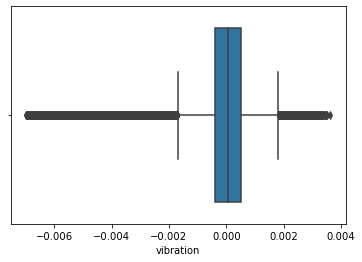

In [8]:
sb.boxplot(X['vibration'])

In [9]:
def find_normal_boundaries(df, variable):    
    # calculate the boundaries outside which lie the outliers for a Gaussian distribution    
    upper_boundary = df[variable].mean() + 10 * df[variable].std()
    lower_boundary = df[variable].mean() - 10 * df[variable].std()    
    return upper_boundary, lower_boundary


In [10]:
upper_boundary, lower_boundary = find_normal_boundaries(X, 'vibration')
print(upper_boundary, lower_boundary)

0.0071039730976409105 -0.0070003626852839


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

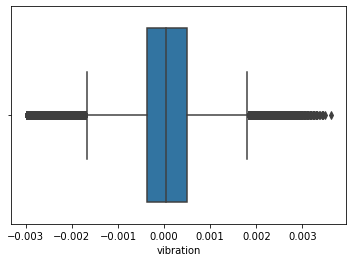

In [11]:
upper_boundary = 0.007
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

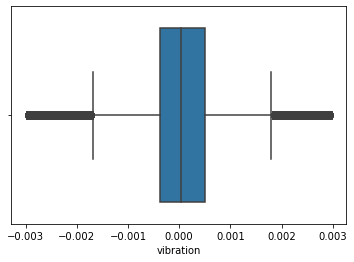

In [12]:
upper_boundary = 0.003
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

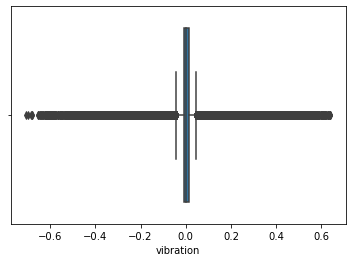

In [13]:
sb.boxplot(y['vibration'])

In [14]:
upper_boundary, lower_boundary = find_normal_boundaries(y, 'vibration')
print(upper_boundary, lower_boundary)

0.3326969678558227 -0.3299069979161344


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

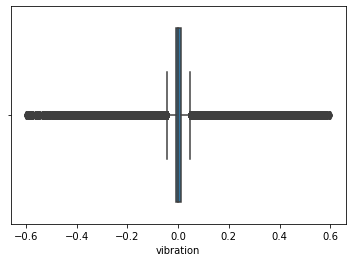

In [15]:
upper_boundary = 0.6
lower_boundary = -0.6

data2 = y[(y['vibration']<upper_boundary) & (y['vibration']>lower_boundary)]

y = data2
y.describe()

sb.boxplot(y['vibration'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [17]:
train = X_train.append(y_train)
train

,speed,vibration,Fault
1361846,0.000009,0.000530,0
667065,0.000964,0.000595,0
460028,0.000009,0.001018,0
672935,0.000009,-0.000478,0
312581,0.001005,0.000043,0
...,...,...,...
152315,4.231508,0.008324,1
963398,0.039634,0.023451,1
117952,0.041935,-0.019957,1
1484420,0.039305,0.007666,1


In [18]:
test = X_test.append(y_test)
test

,speed,vibration,Fault
1456698,0.000009,-0.000575,0
1704724,0.000009,-0.000022,0
850351,0.000990,0.000465,0
1821345,0.001003,0.001083,0
892141,0.000009,-0.000055,0
...,...,...,...
961532,4.250577,-0.017984,1
1653407,0.039634,0.034303,1
1122248,0.039305,-0.110061,1
856569,0.040291,-0.021273,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [20]:
train.shape

(3109469, 3)

In [21]:
test.shape

(777368, 3)

In [22]:
train = train.values.reshape(-1, 1, 3)

In [23]:
test  = test.values.reshape(-1, 1, 3)

In [24]:
#pip install keras
train.shape

(3109469, 1, 3)

In [25]:
test.shape

(777368, 1, 3)

In [26]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [27]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4608      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
____________________________________________________

In [28]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0137 - accuracy: 0.9230 - val_loss: 3.9322e-04 - val_accuracy: 0.9995
Epoch 2/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0032 - accuracy: 0.9332 - val_loss: 3.6430e-04 - val_accuracy: 0.9995
Epoch 3/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0030 - accuracy: 0.9355 - val_loss: 3.2022e-04 - val_accuracy: 0.9995
Epoch 4/100
2799/2799 [==============================] - 15s 5ms/step - loss: 0.0030 - accuracy: 0.9353 - val_loss: 3.2735e-04 - val_accuracy: 0.9995
Epoch 5/100
2799/2799 [==============================] - 14s 5ms/step - loss: 0.0030 - accuracy: 0.9355 - val_loss: 3.0433e-04 - val_accuracy: 0.9995
Epoch 6/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0030 - accuracy: 0.9354 - val_loss: 2.8766e-04 - val_accuracy: 0.9995
Epoch 7/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0030 - accuracy: 0.9

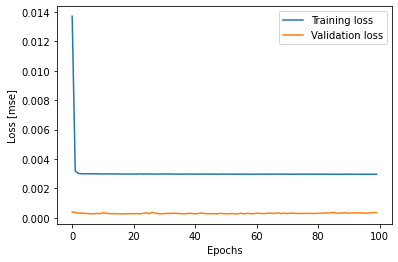

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [30]:
pred_train = model.predict(train)

In [31]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


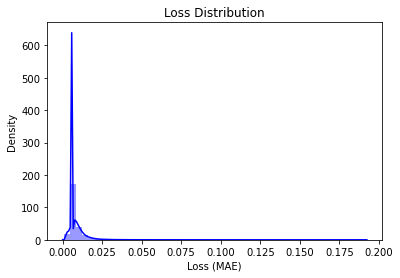

In [32]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [33]:
TH = 0.1
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [34]:
scored_train['Loss_mae'].mean()

0.00802673927319749

Text(0, 0.5, 'Loss (MAE)')

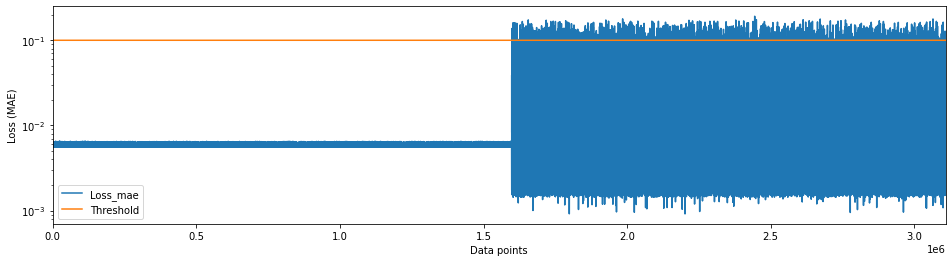

In [35]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [36]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.005740,0.1,False
1,0.005687,0.1,False
2,0.005877,0.1,False
3,0.005818,0.1,False
4,0.005600,0.1,False
...,...,...,...
3109464,0.005566,0.1,False
3109465,0.013154,0.1,False
3109466,0.013111,0.1,False
3109467,0.008869,0.1,False


In [37]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

         Loss_mae  Threshold  Anomaly
1599011  0.101566        0.1     True
1599207  0.137643        0.1     True
1602148  0.108409        0.1     True
1603254  0.160986        0.1     True
1604847  0.158354        0.1     True
...           ...        ...      ...
3101021  0.163162        0.1     True
3101134  0.112440        0.1     True
3103913  0.108719        0.1     True
3107396  0.128036        0.1     True
3108760  0.116737        0.1     True

[1474 rows x 3 columns]
(1474, 3)


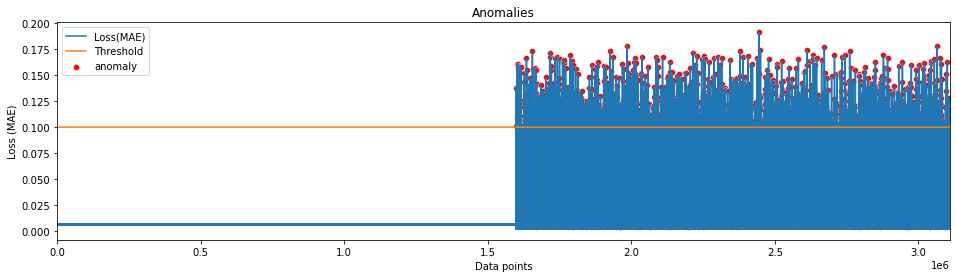

In [38]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [39]:
pred_test = model.predict(test)

In [40]:
score = model.evaluate(test,test)
score

24293/24293 [==============================] - 22s 920us/step - loss: 1.9456e-04 - accuracy: 0.9998


[0.00019456482550594956, 0.9997555613517761]

In [41]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


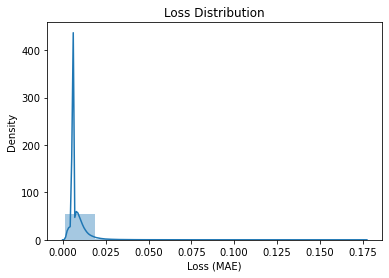

In [42]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [43]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.005845,0.1,False
1,0.005692,0.1,False
2,0.005649,0.1,False
3,0.005821,0.1,False
4,0.005701,0.1,False
...,...,...,...
777363,0.010283,0.1,False
777364,0.016112,0.1,False
777365,0.038794,0.1,False
777366,0.013563,0.1,False


In [44]:
scored_test['Loss_mae'].mean()

0.008021894125127426

Text(0, 0.5, 'Loss (MAE)')

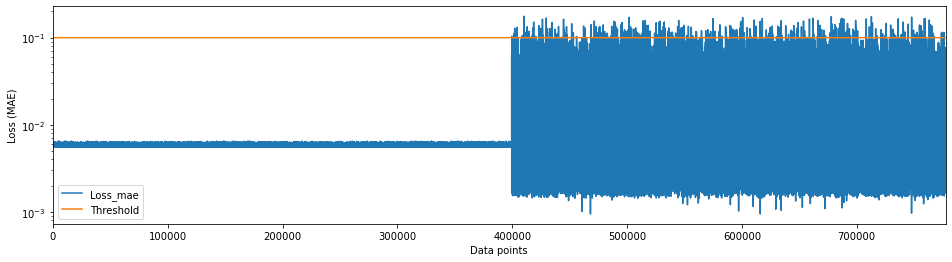

In [45]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [46]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

        Loss_mae  Threshold  Anomaly
399642  0.103615        0.1     True
401331  0.111130        0.1     True
402154  0.128573        0.1     True
402248  0.118275        0.1     True
404069  0.131392        0.1     True
...          ...        ...      ...
766496  0.101459        0.1     True
767392  0.103361        0.1     True
773811  0.113023        0.1     True
773929  0.115230        0.1     True
775902  0.115230        0.1     True

[356 rows x 3 columns]
(356, 3)


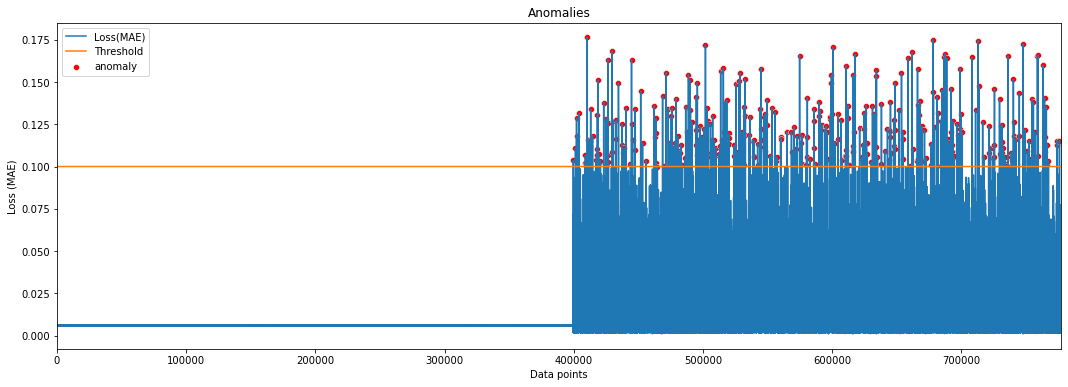

In [47]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [48]:
print(score[1])

0.9997555613517761


In [49]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 99.98%


In [50]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 356


In [51]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [52]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.005845,0.1,False
1,0.005692,0.1,False
2,0.005649,0.1,False
3,0.005821,0.1,False
4,0.005701,0.1,False
...,...,...,...
388679,0.005638,0.1,False
388680,0.005791,0.1,False
388681,0.005593,0.1,False
388682,0.005620,0.1,False


In [53]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
388684,0.005666,0.1,False
388685,0.005737,0.1,False
388686,0.005686,0.1,False
388687,0.006031,0.1,False
388688,0.005970,0.1,False
...,...,...,...
777363,0.010283,0.1,False
777364,0.016112,0.1,False
777365,0.038794,0.1,False
777366,0.013563,0.1,False


In [54]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 388684
False Positives: 0
True Negatives: 356
False Negatives: 388328


In [55]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 100.00%
Recall: 50.023%
F1 Score: 66.69%
Accuracy: 50.05%
